<a href="https://colab.research.google.com/github/Krshnna/Customer-K-Means-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans

Data Collection and Analysis

In [2]:
df = pd.read_csv('/content/customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#dropping customer_id as it doesnt make senes
df.drop(['CustomerID'], axis = 1, inplace = True)

In [4]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


Plotting based on gender

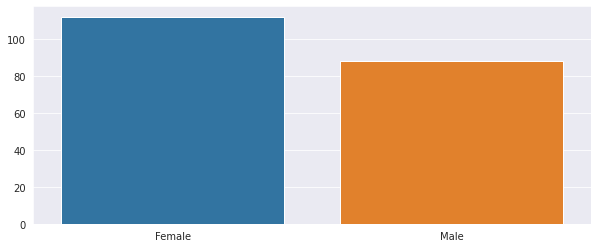

In [7]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize = (10, 4))
sns.barplot(x = genders.index, y = genders.values)
plt.show()

In [8]:
print(df.Age.value_counts())

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64


In [9]:
#Choosing the Annual Income Column and Spending Column

In [10]:
X = df.iloc[:, [2, 3]].values

Choosing the correct number of clusters

WCSS -> Within Clusters Sum of Squares

In [11]:
# finding wcss value for different number of clusters

wcss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, init = "k-means++", random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

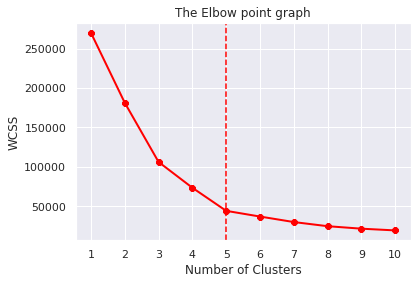

In [13]:
# elbow graph plot to find which cluster has minimum wcss
sns.set()
plt.plot(range(1, 11), wcss, linewidth = 2, color = "red", marker = "8")
plt.title('The Elbow point graph')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(1, 11, 1))
plt.ylabel('WCSS')
plt.axvline(5, ls = '--', color = "red", label = "k = " + str(5))
plt.show()

Optimal Number of Clusters = 5

Training the k-Means clustering model

In [14]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 0)

#return a label for each data point based on there clusters
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


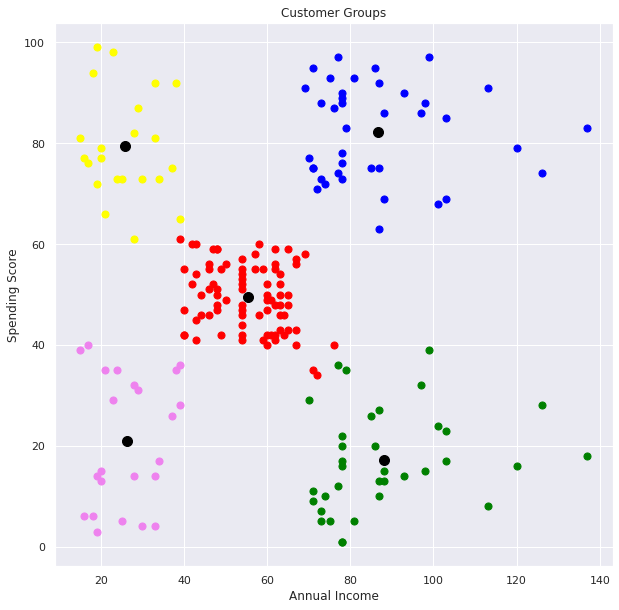

In [15]:
#visualising all the clusters

# plotting all the clusters and their centroids

plt.figure(figsize = (10, 10))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 50, c = 'green', label = "Cluster 1")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 50, c = "red", label = "Cluster 2")
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 50, c = "blue", label = "Cluster 3")
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s = 50, c = "yellow", label = "Cluster 4")
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s = 50, c = "violet", label = "Cluster 5")

#plot the centroids 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = "Centroid")
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()